# KNN

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB, MultinomialNB
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"glass.csv")
print("data Shape:",data.shape)
data.tail()

data Shape: (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0

## Variable check

### Find columns with the same values

In [5]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, nos:",columns_with_same_values ,",Final shape:", data.shape)

excluded columns_with_same_values, nos: [] ,Final shape: (214, 10)


In [6]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 1
['Type']

Continuous Feature Count 9
['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

Other Features Count: 0
Other Features: []

Numeric Data Shape: (214, 10)
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

Categorical Data Shape: (214, 0)
Categorical Columns: Index([], dtype='object')


## Categorical Data - Nothing

Bar plot for all categorical

In [7]:
# num_columns = len(categorical_data.columns)
# num_rows = num_columns // 2 + num_columns % 2  # Ensure odd number of columns works correctly
# fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 9))

# pal = sns.color_palette('rainbow')
# for i, column in enumerate(categorical_data.columns):
#     row_index = i // 2
#     col_index = i % 2
    
#     sns.countplot(x=column, data=categorical_data, palette=pal,
#                   order=categorical_data[column].value_counts().index,
#                   ax=axes[row_index, col_index])
    
#     axes[row_index, col_index].set_xticklabels(axes[row_index, col_index].get_xticklabels(), rotation=90, fontsize=12)
#     axes[row_index, col_index].set_title(f'{column} Counts')

# # Adjust layout
# plt.tight_layout()
# plt.show()


### Labelencoder to convert categorical data into numeric

In [8]:
# cat_data = categorical_data.copy()
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for column in categorical_data.columns:
#     cat_data[column] = label_encoder.fit_transform(cat_data[column])
    
#     print(f"\nLabel Encoding for {column}:")
#     # print("\n", cat_data[column].value_counts())
#     unique_values = categorical_data[column].unique()

#     for value in unique_values:
#         label = label_encoder.transform([value])[0]
#         counts = cat_data[column].value_counts()[label]
#         print(f"Value: {value} -> Label: {label} --> Counts: {counts}")
    

In [9]:
# # Correlation Plot
# corr_matrix = cat_data.corr(numeric_only=True)
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [10]:
# categorical_columns = categorical_data.columns
# for column in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=categorical_data, x=column, hue='Salary')
#     plt.title(f'Count Plot for {column} with respect to Salary')
#     plt.show()

## Numeric Data

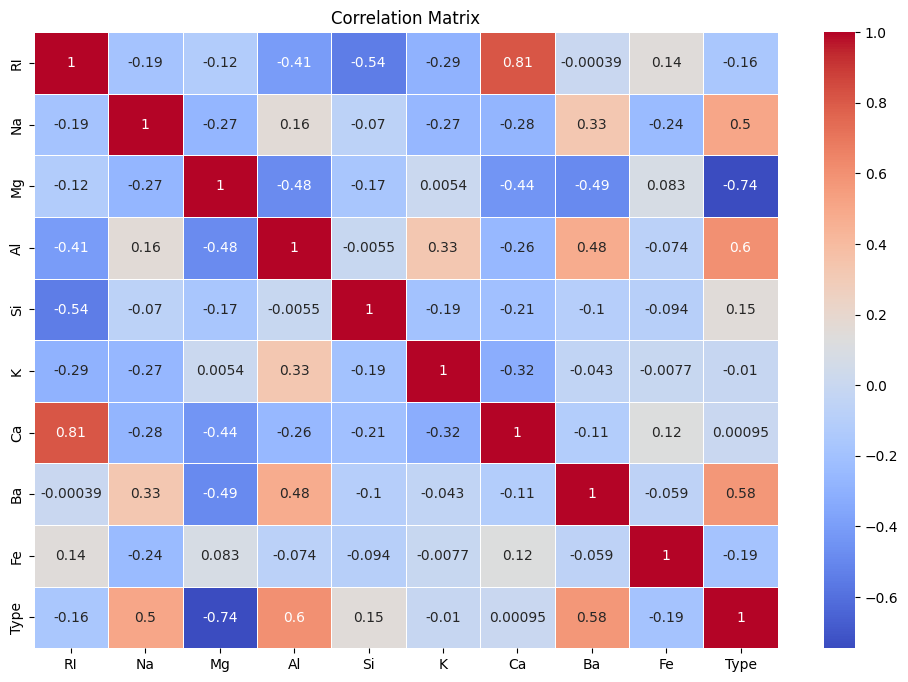

In [11]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# # Correlation Plot with dependent_variable
# data_2 = pd.concat([numeric_data, cat_data['____']], axis=1)
# corr_matrix = data_2.corr(numeric_only=True)
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

### visualization

In [13]:
# # relationship plot for categorical data
# sns.pairplot(data= cat_data)
# plt.show()

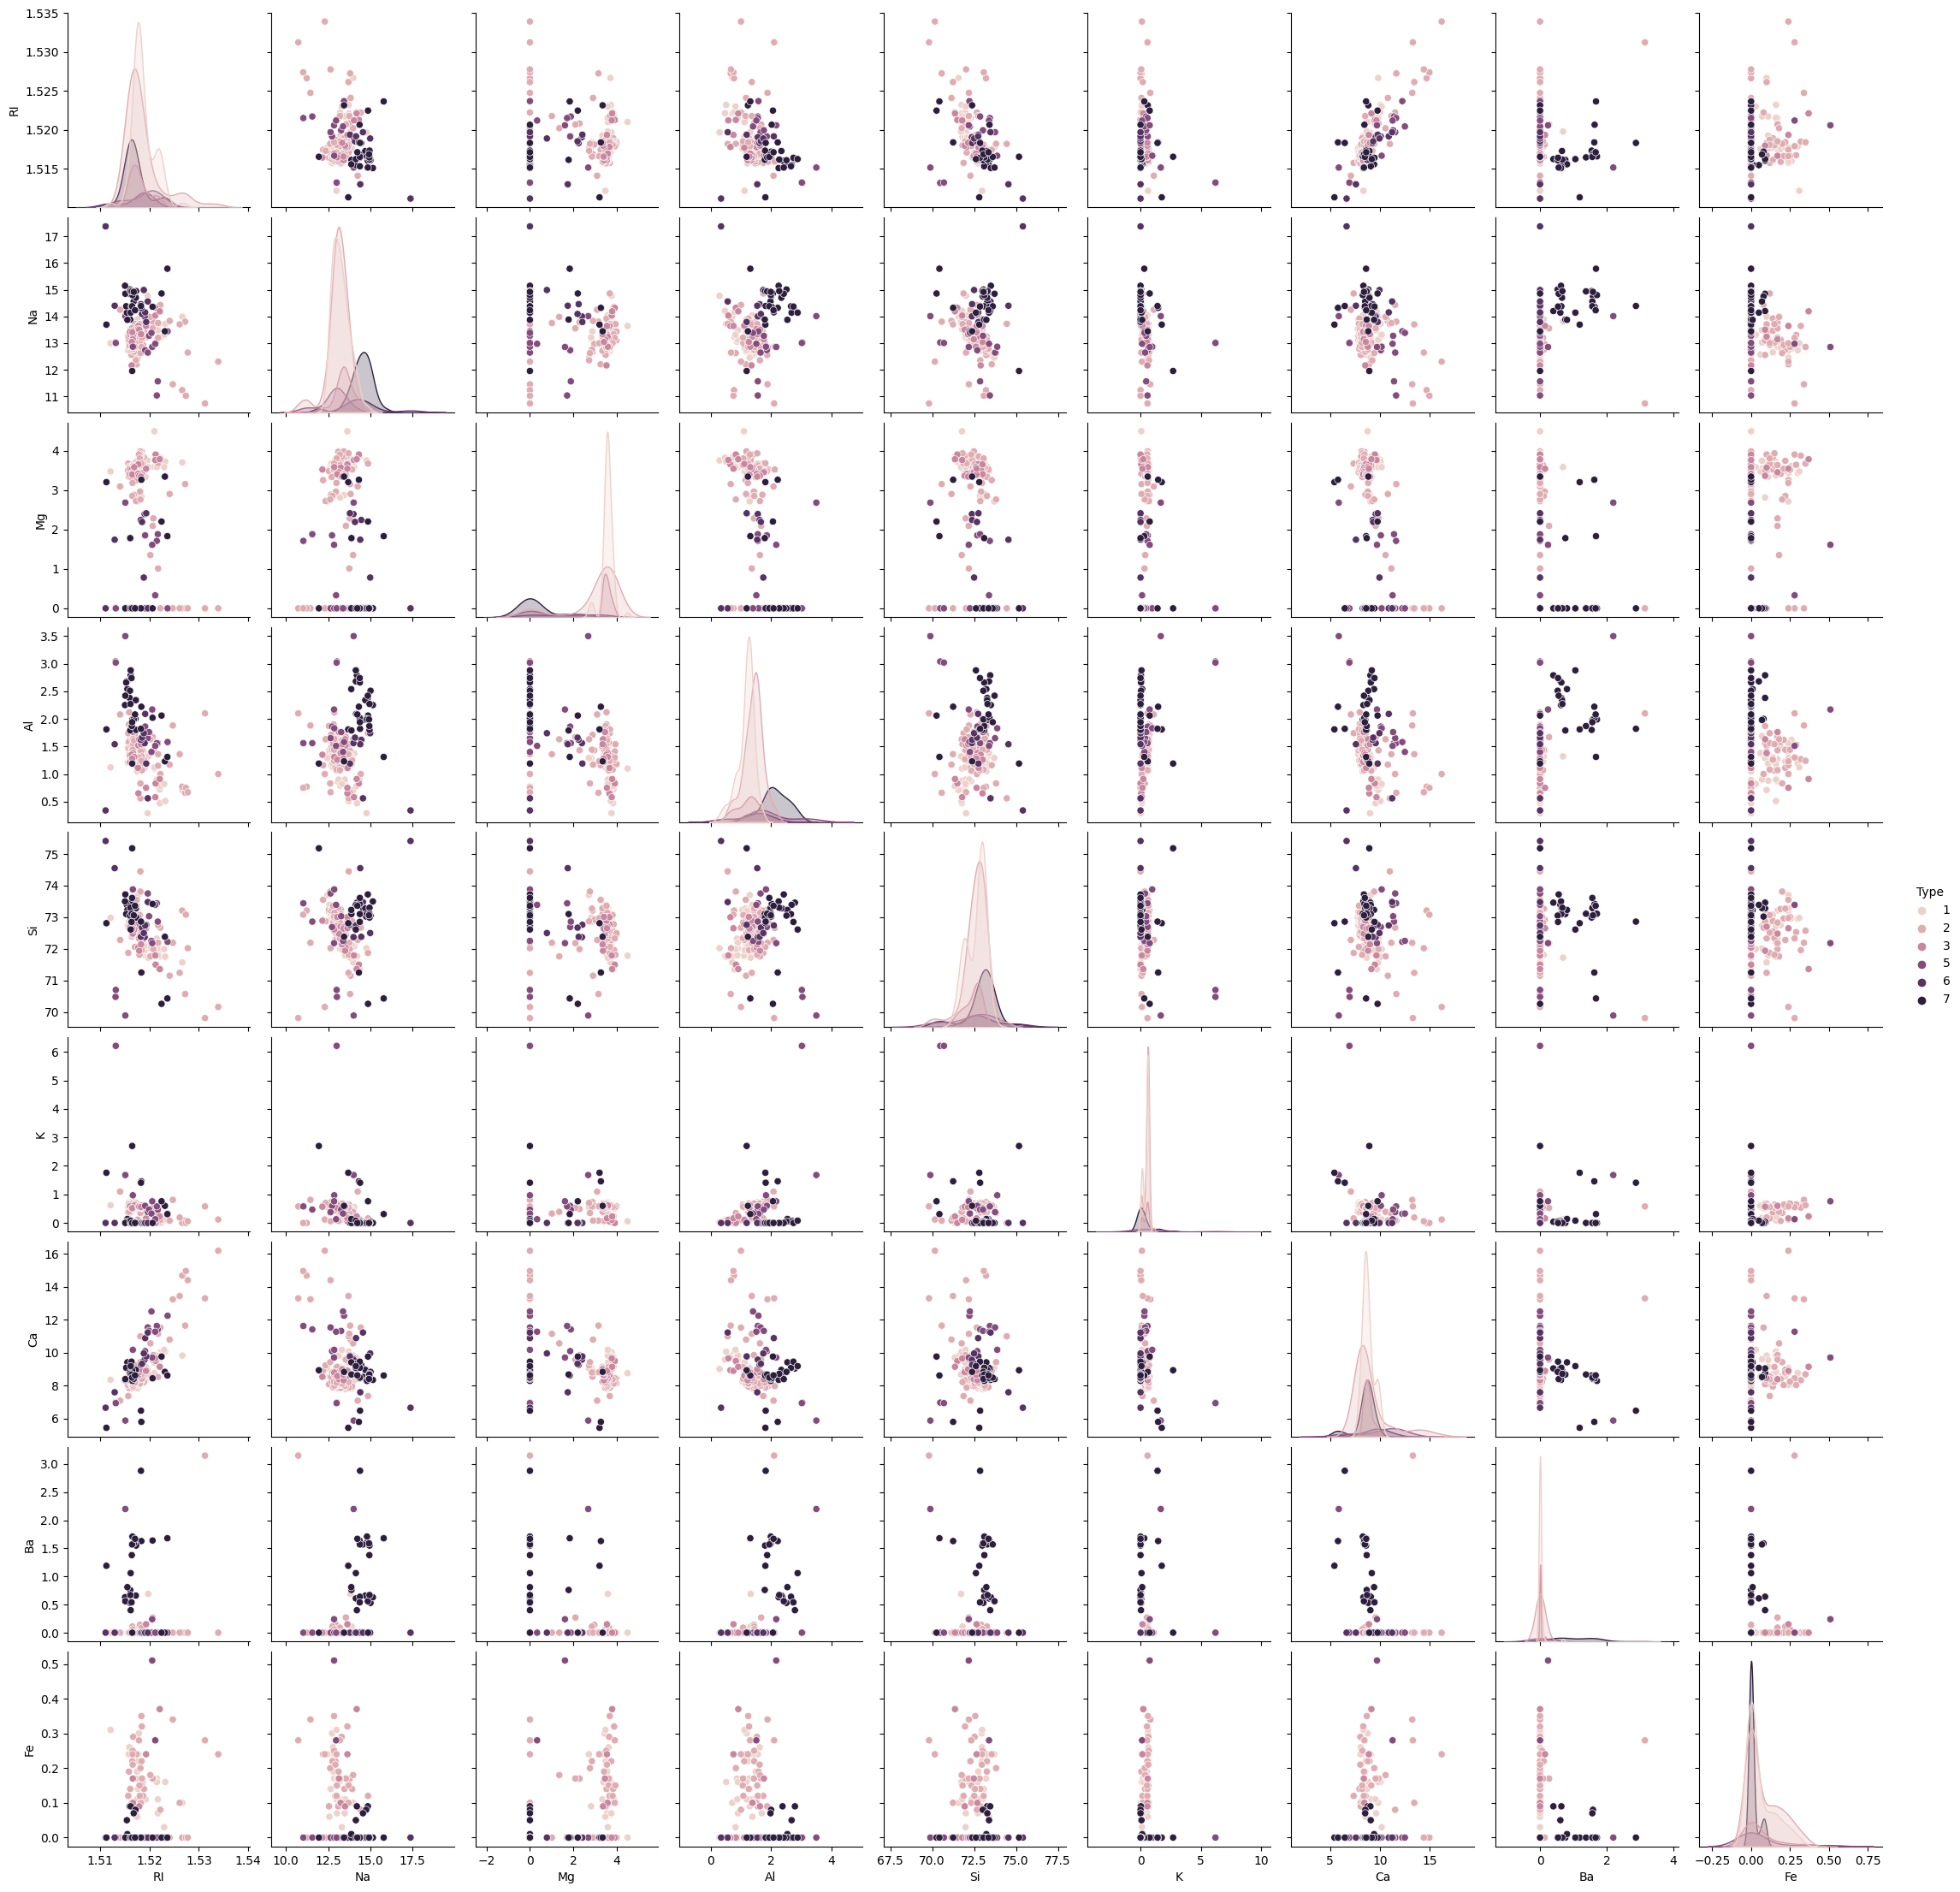

In [14]:
# relationship plot for numeric data
sns.pairplot(data= data, hue = 'Type')
plt.show()

### Detect outliers and handle them

In [15]:
data_filtered=data
# data_filtered=pd.concat([numeric_data,cat_data],axis=1)    #,cat_data ,numeric_data, data_2
data_filtered.shape

(214, 10)

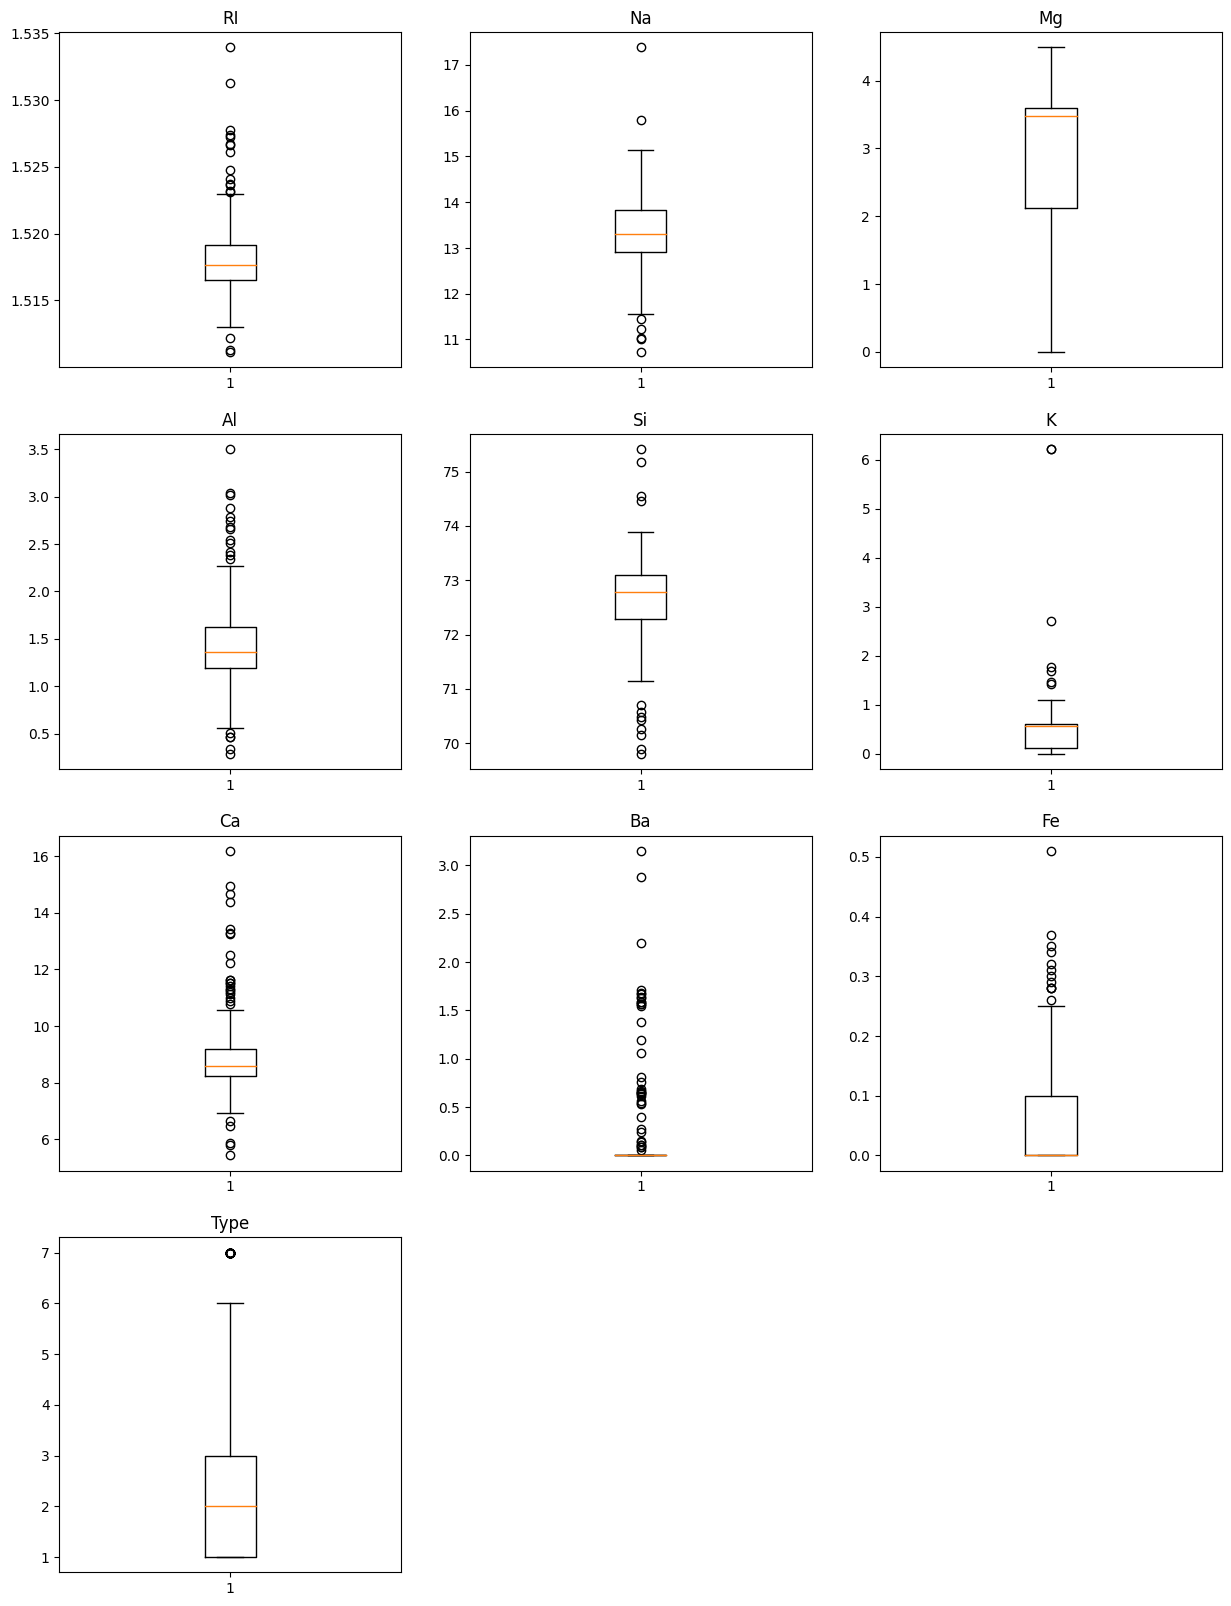

In [16]:
# display boxplots

num_columns = len(numeric_data.columns)
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR

In [17]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # # Changing the outliers
    # new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    # new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: RI
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
187  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.0     7
189  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.0     7


Column Name: Na
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
184  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.0     6
189  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.0     7


Column Name: Mg
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []


Column Name: Al
          RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
208  1.51640  14.37  0.0  2.74  72.85  0.00  9.45  0.54  0.0     7
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7


Column Name: Si
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
189  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.0     7
201  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.0     7


Column Name: K
   

Note: not removing outliers,

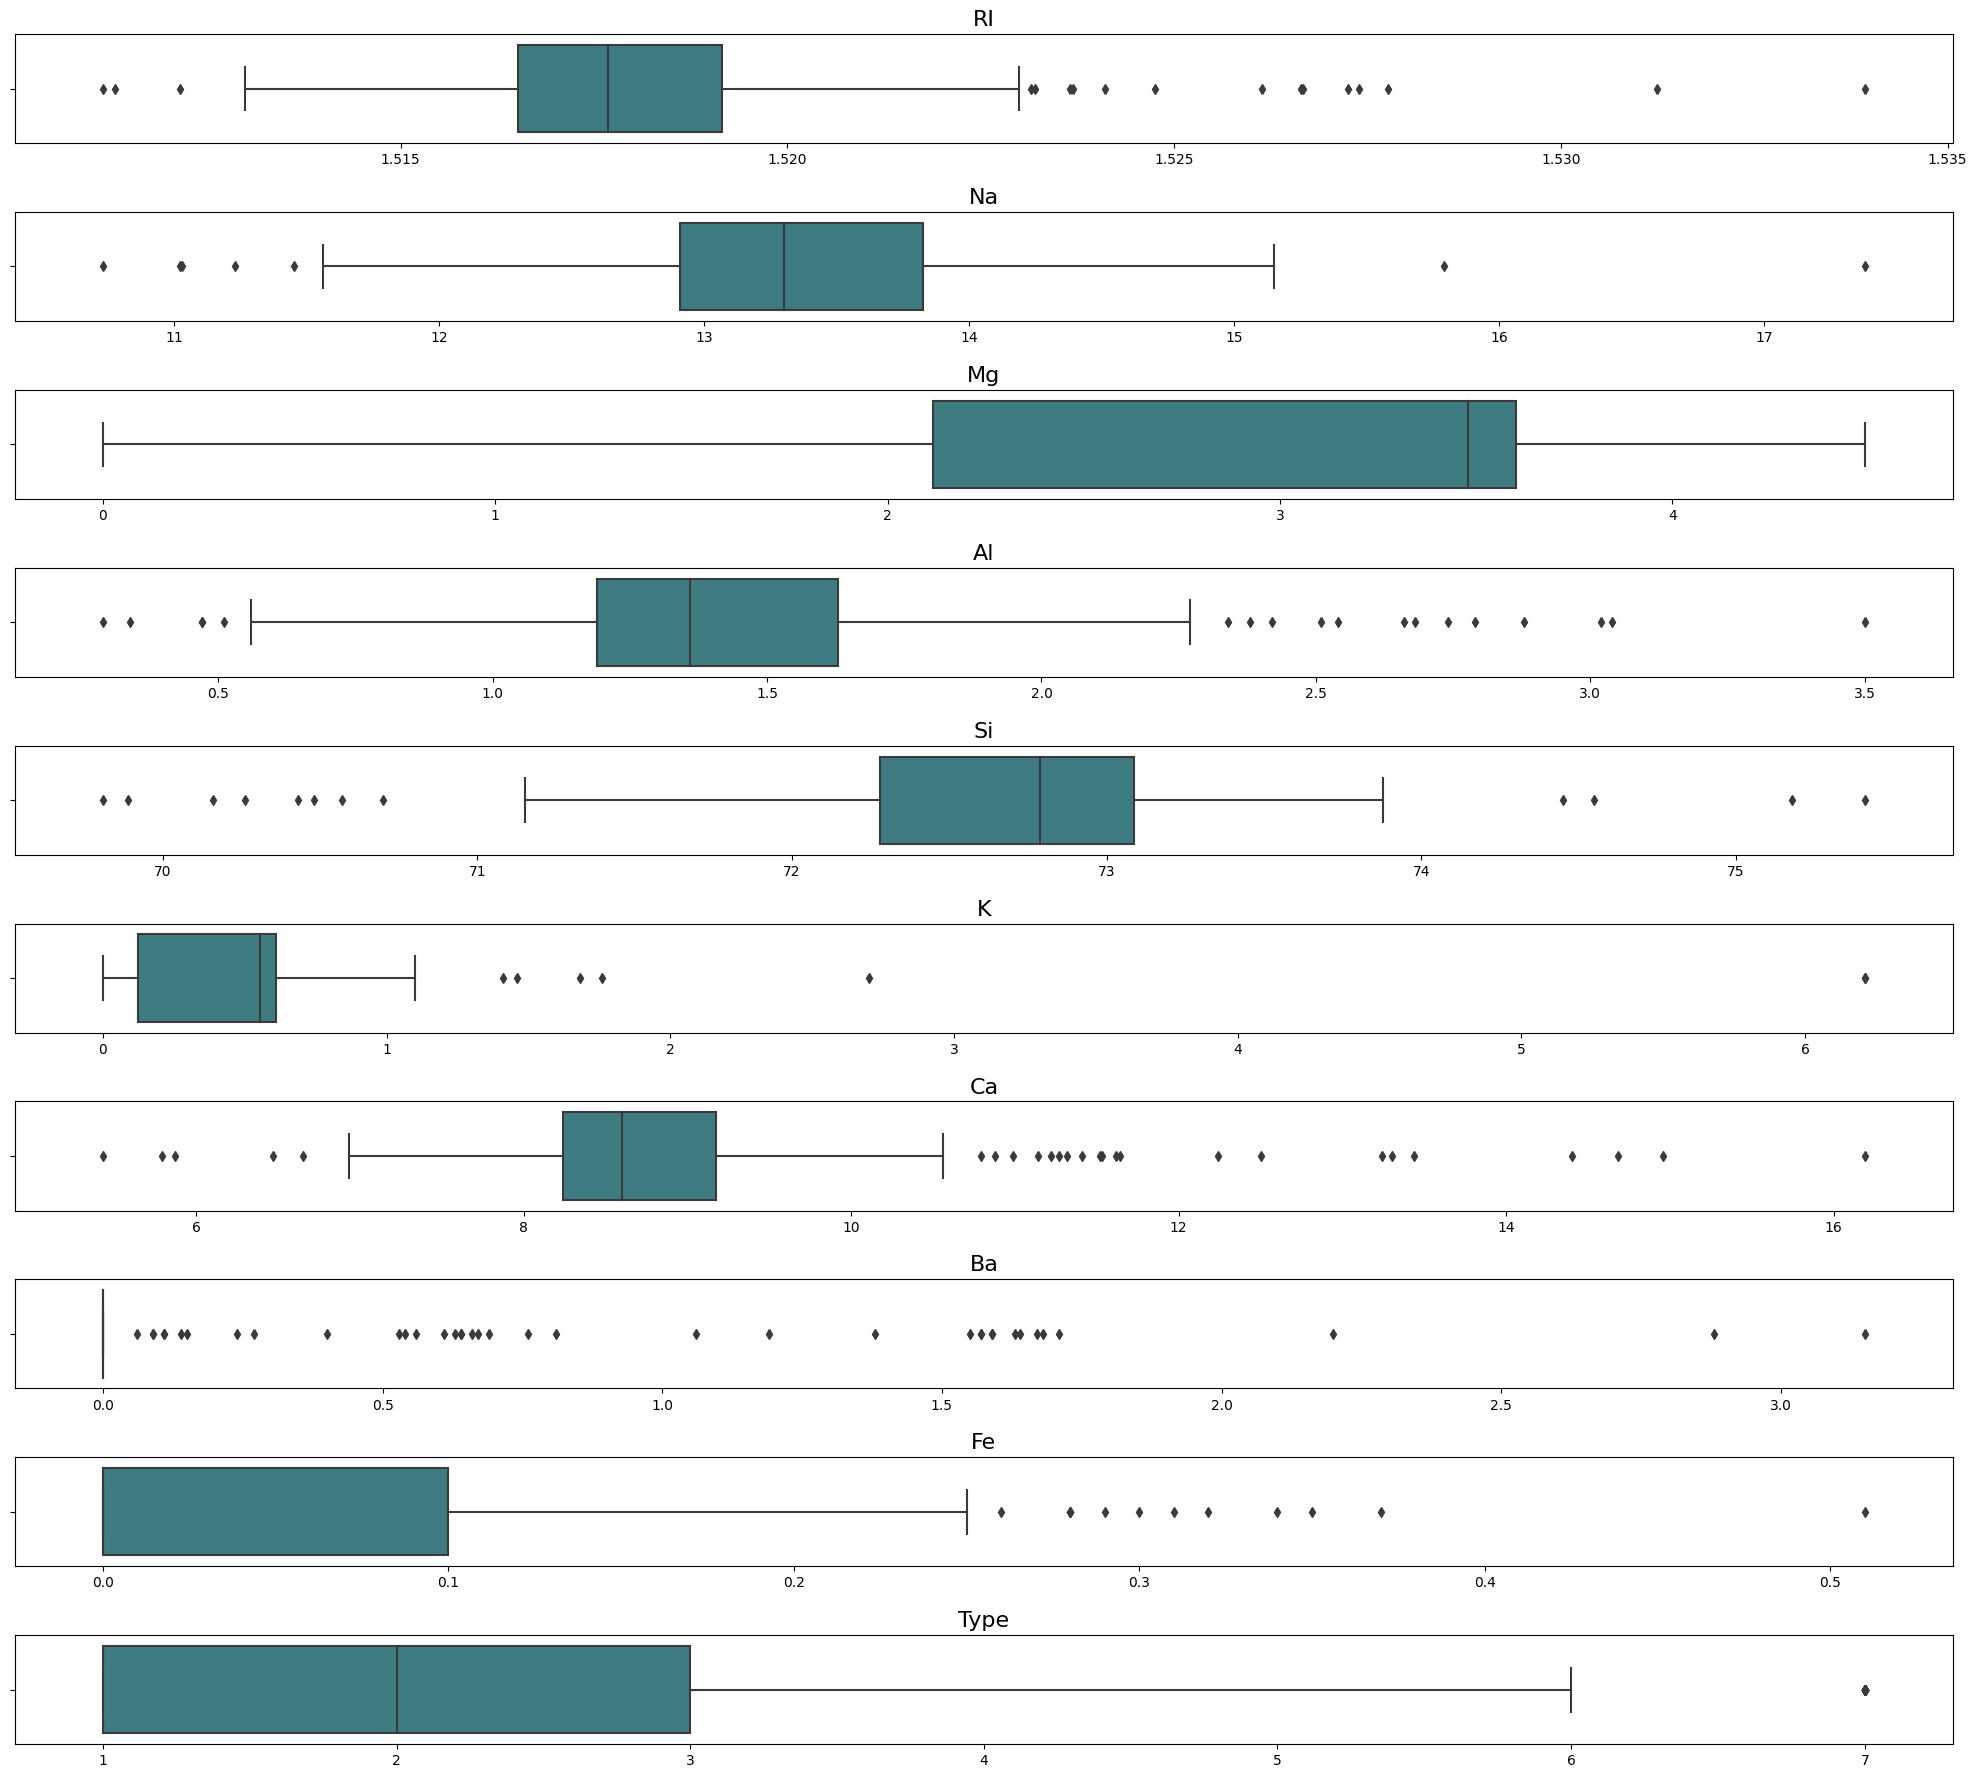

In [18]:
# display boxplots of Treated outliers with IQR

# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(new_data.columns), 1, figsize=(20, 18), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(new_data):
    sns.boxplot(x=variable, data=new_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()


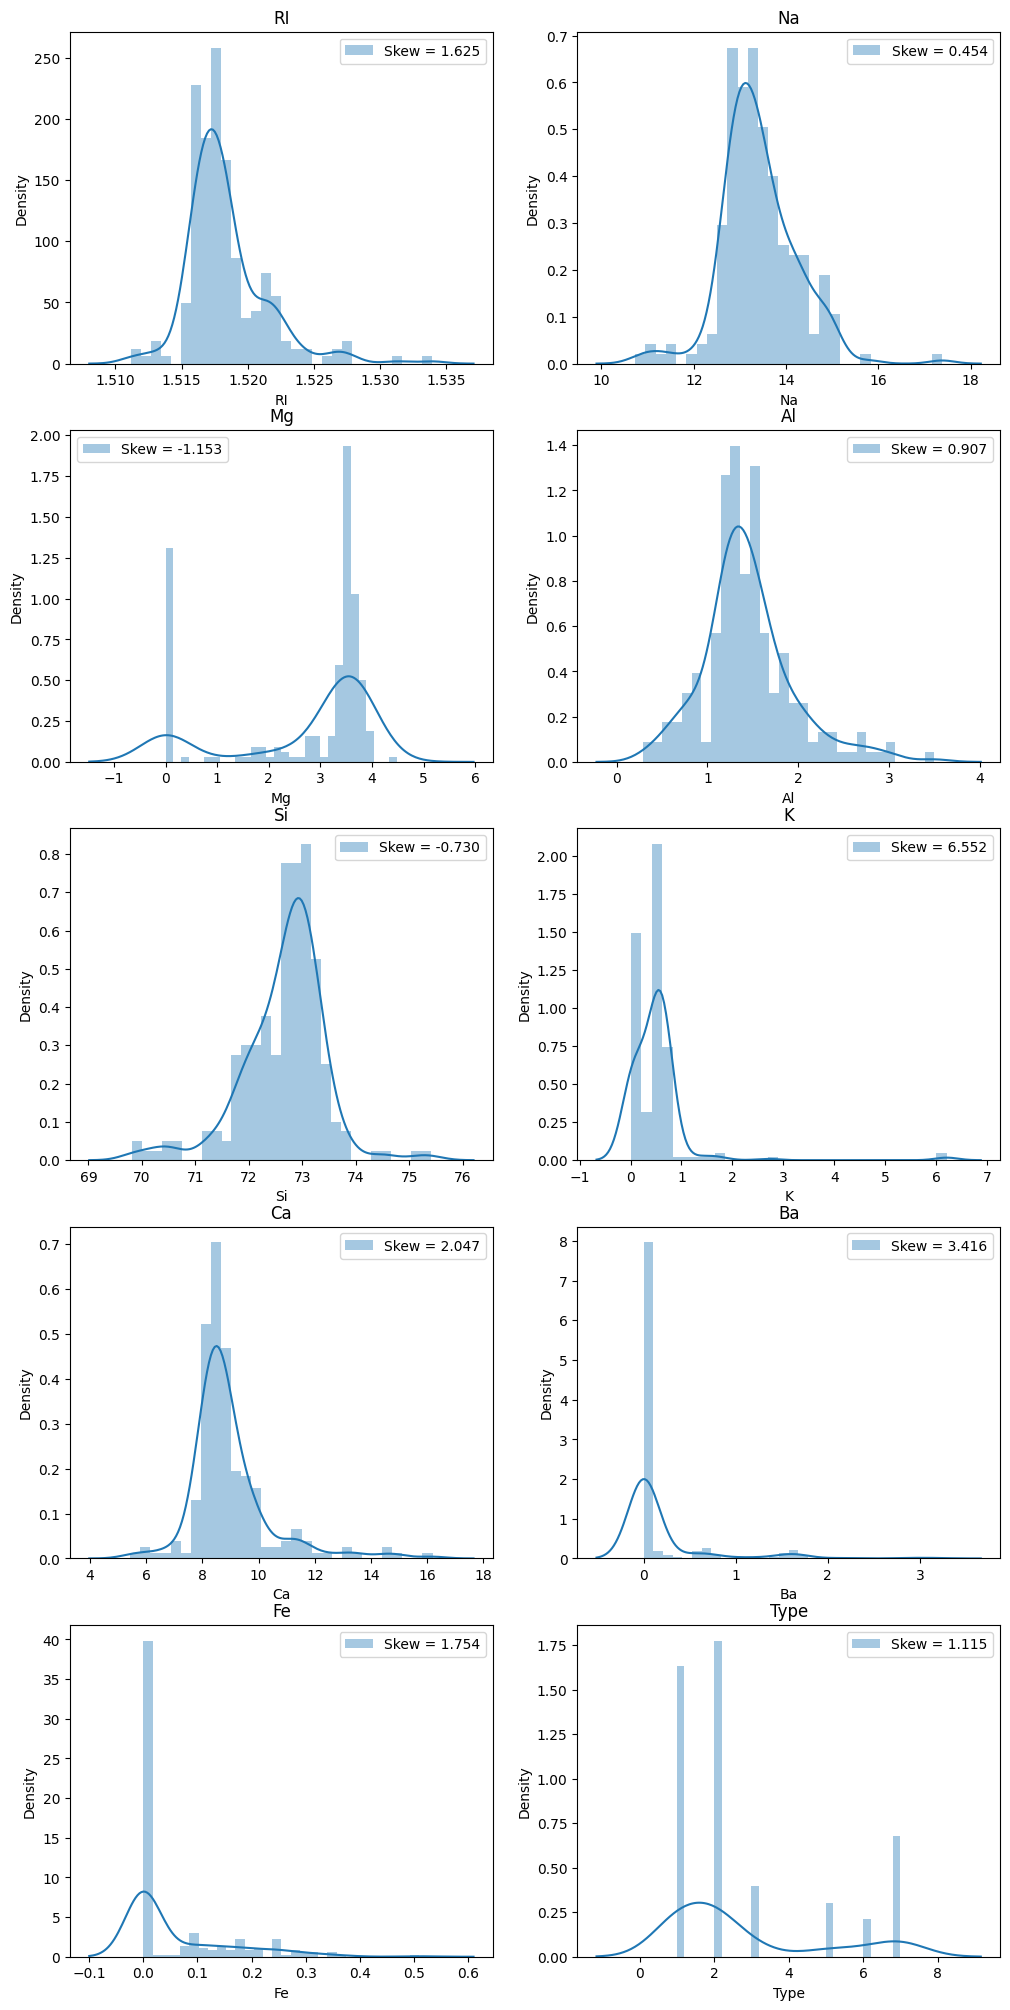

In [19]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    skew = new_data[column].skew()
    sns.distplot(new_data[column], kde= True, label='Skew = %.3f' %(skew), bins=30, ax=ax)
    ax.legend(loc='best')
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


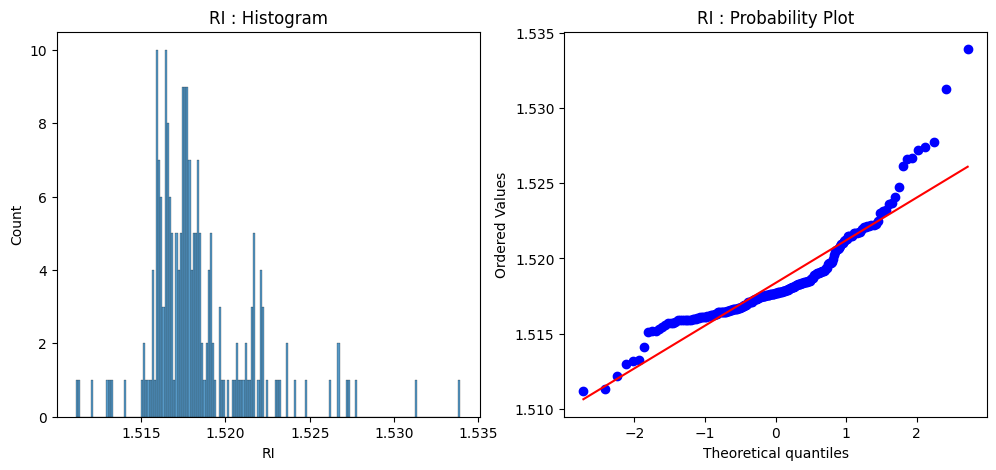

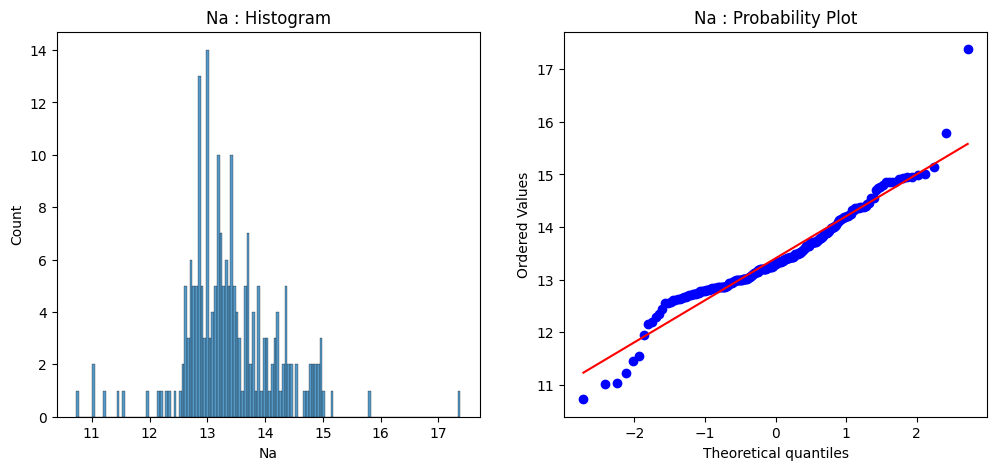

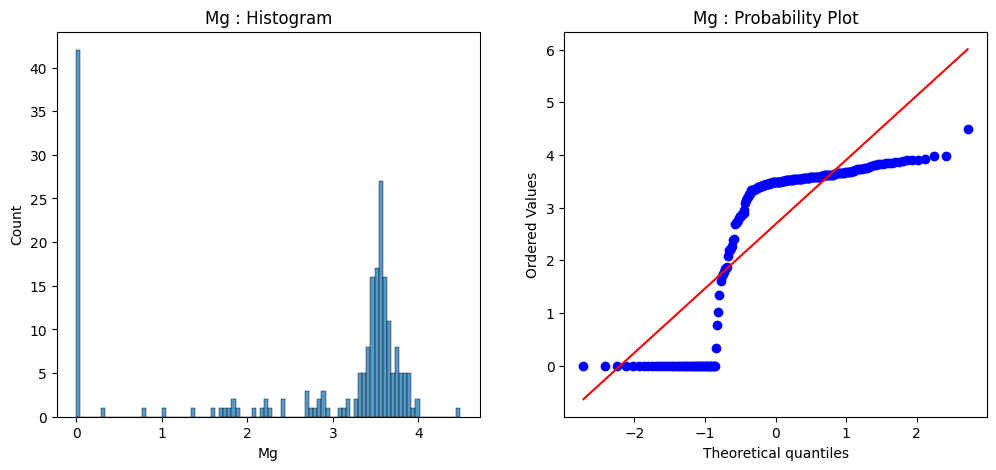

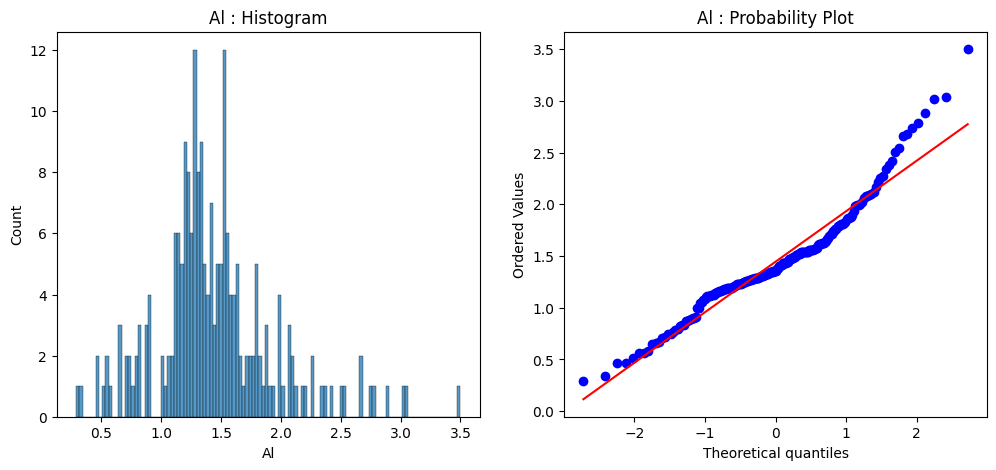

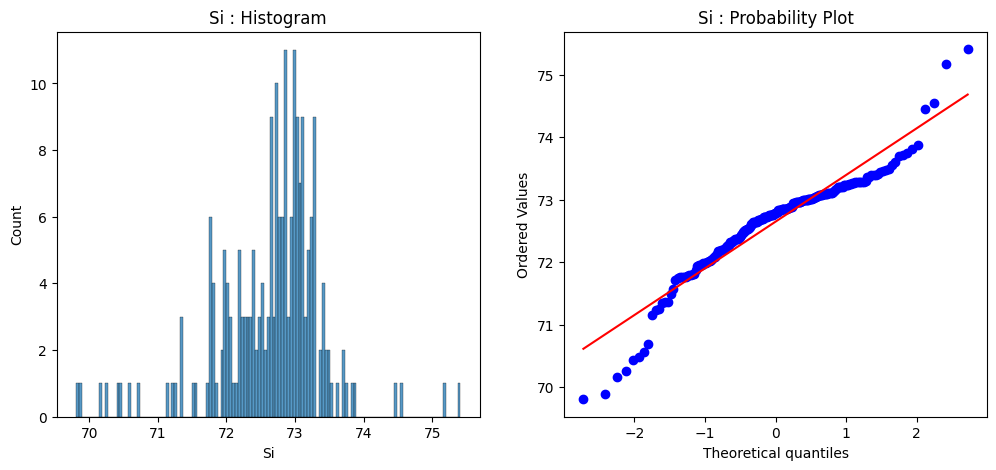

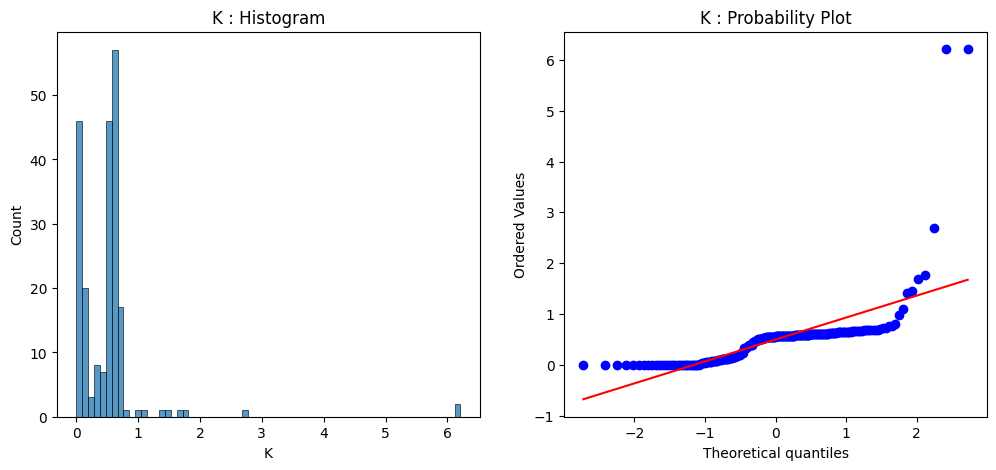

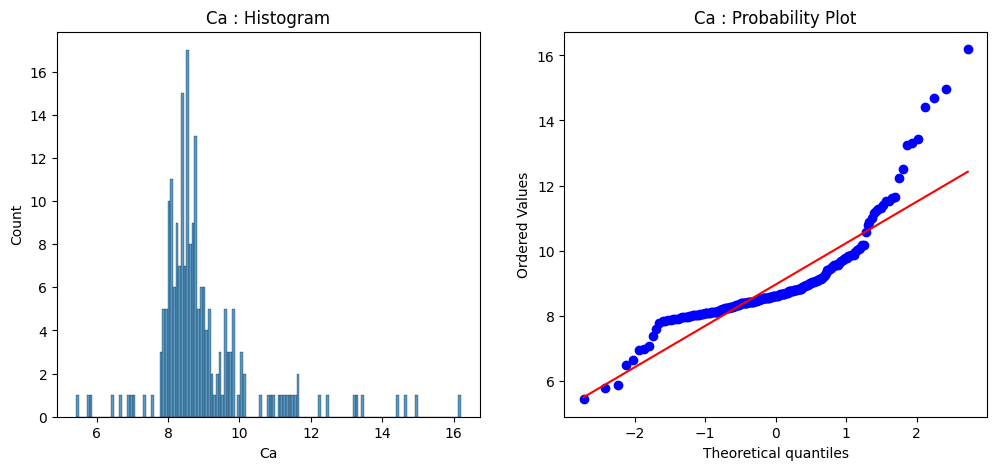

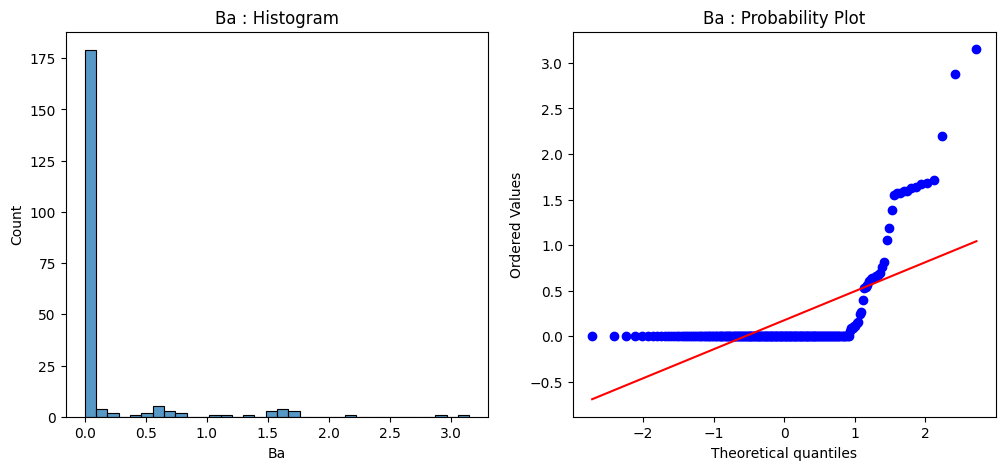

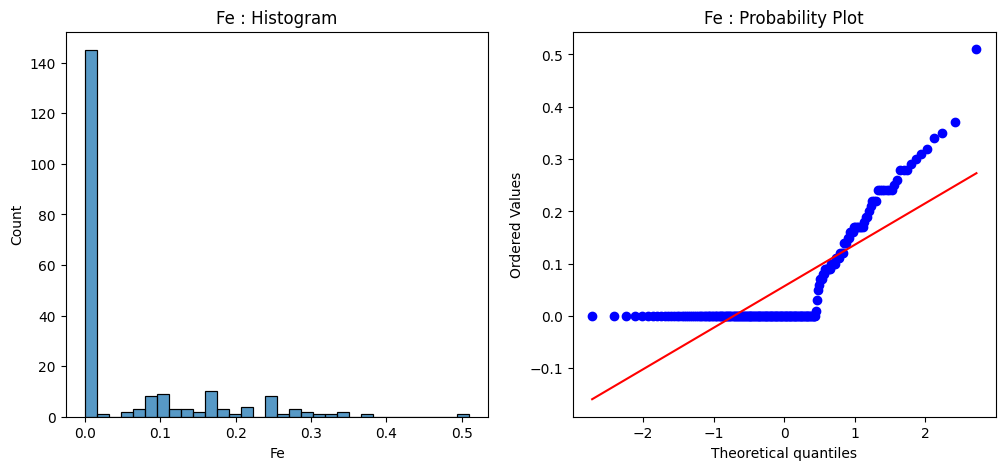

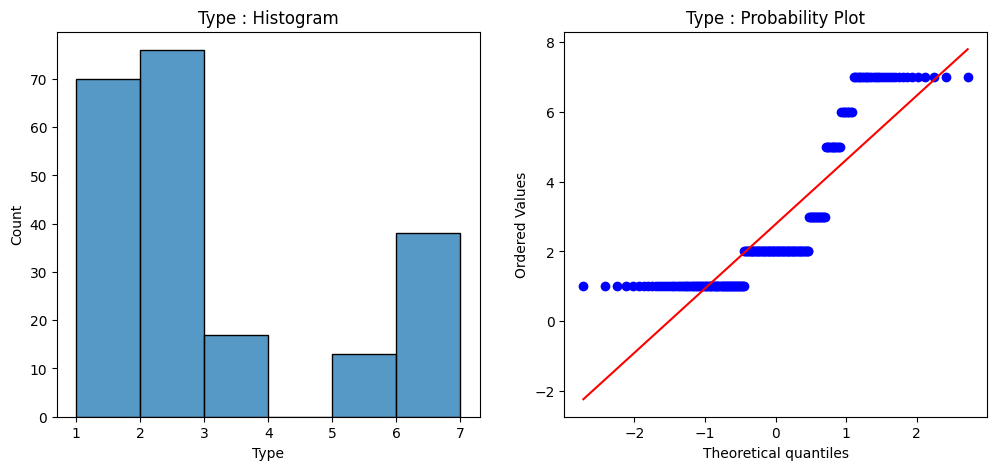

In [20]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    # sns.barplot(x = df[feature].value_counts().index.tolist(), y = df[feature].value_counts().tolist())
    sns.histplot(df[feature], bins=len(df[feature].value_counts()))
    # df[feature].hist()
    plt.title(f'{feature} : Histogram')
    
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


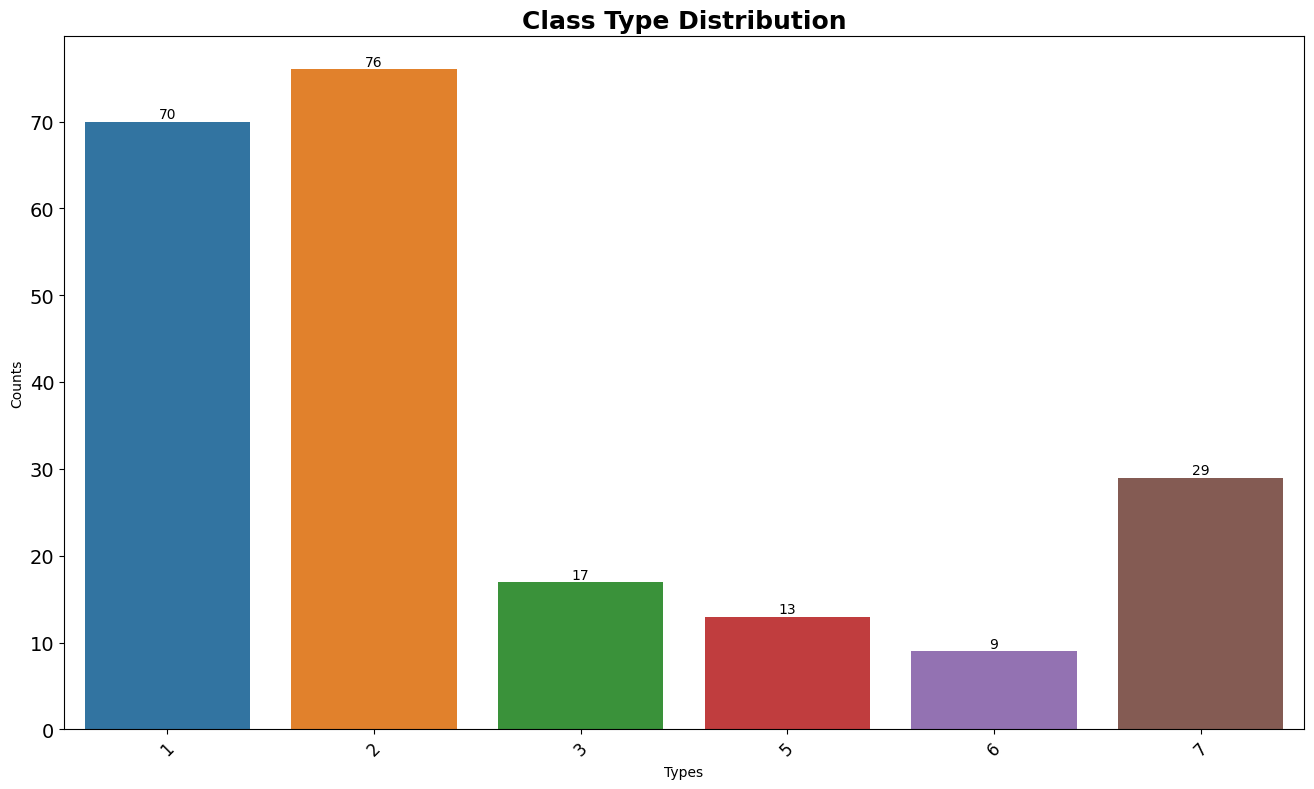

In [21]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = data['Type'].value_counts().index.tolist(), y = data['Type'].value_counts().tolist()) 
                # 'ax' -  to add labels to the bars
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Types')
plt.ylabel('Counts')
# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i,)

# Model Building  & Testing

In [22]:
# x_train = new_data.iloc[:,:-1]    # new_data
# y_train = new_data.iloc[:,-1]
# x_test = new_data.iloc[:,:-1]
# y_test = new_data.iloc[:,-1]

X = new_data.drop('Type',axis=1)
y = new_data[['Type']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)
X_train

Shape of X_train:  (149, 9)
Shape of X_test:  (65, 9)
Shape of y_train:  (149, 1)
Shape of y_test (65, 1)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.0,0.00
...,...,...,...,...,...,...,...,...,...
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10


## standardization

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 2.88353451, -2.91620048, -1.7840577 , ...,  3.96668863,
        -0.36707948, -0.5543926 ],
       [-0.15560483,  0.06164903,  0.50412862, ..., -0.11212452,
        -0.36707948,  0.44890089],
       [-0.40054077, -0.08244046,  0.59946971, ..., -0.36414875,
        -0.36707948, -0.5543926 ],
       ...,
       [-0.43921487,  0.3258131 ,  0.72205112, ..., -0.72892065,
        -0.36707948, -0.5543926 ],
       [ 2.65148993,  0.65001445,  0.73567128, ...,  0.55772935,
        -0.36707948,  0.56037795],
       [-1.68645445, -0.53872386, -1.7840577 , ..., -1.35898122,
        -0.36707948, -0.5543926 ]])

# KNeighborsClassifier

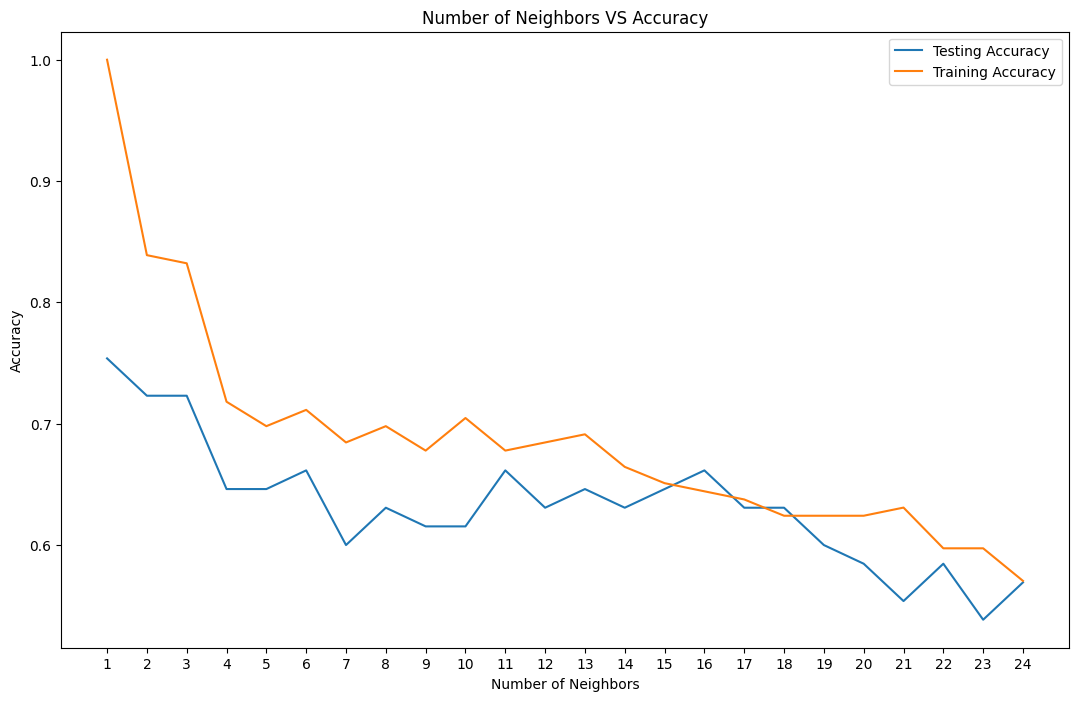

In [24]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

from sklearn.neighbors import KNeighborsClassifier
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Number of Neighbors VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
scores = []
cv_scores = []
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)
score_knn=cross_val_score(knn, X,y, cv=10)
print('Score:',score_knn.mean())
print('Std:',score_knn.std()*2)
score_knn

Score: 0.6502164502164502
Std: 0.2458035952389518


array([0.63636364, 0.5       , 0.72727273, 0.59090909, 0.71428571,
       0.80952381, 0.76190476, 0.38095238, 0.71428571, 0.66666667])

Confusion Matrix:

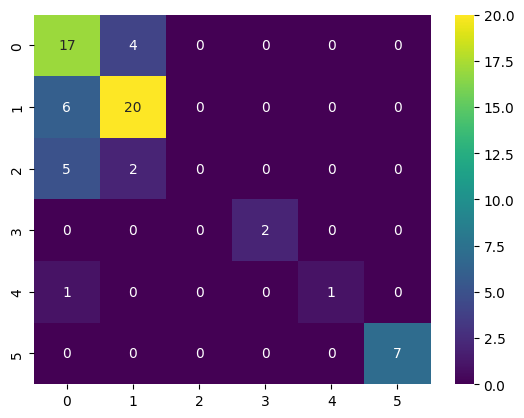

In [26]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_KNeighborsClassifier), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

compare the actual with the predicted:

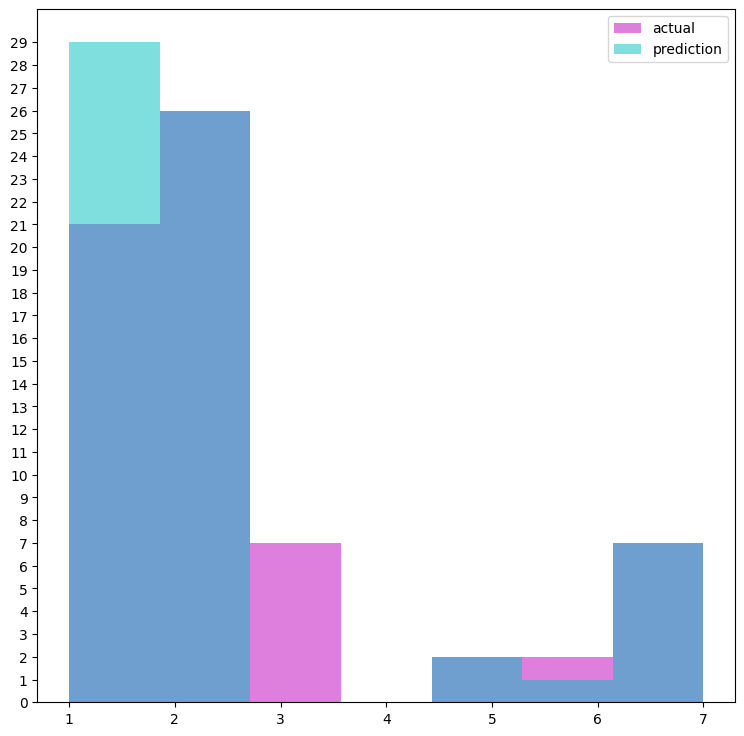

In [27]:
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred_KNeighborsClassifier, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

Precision, Recall, and F1-Score:

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_KNeighborsClassifier, average='weighted')
recall = recall_score(y_test, y_pred_KNeighborsClassifier, average='weighted')
f1 = f1_score(y_test, y_pred_KNeighborsClassifier, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Precision: 0.6663129973474801, Recall: 0.7230769230769231, F1-Score: 0.6863589743589744


Receiver Operating Characteristic (ROC) Curve: Multi Classification problem

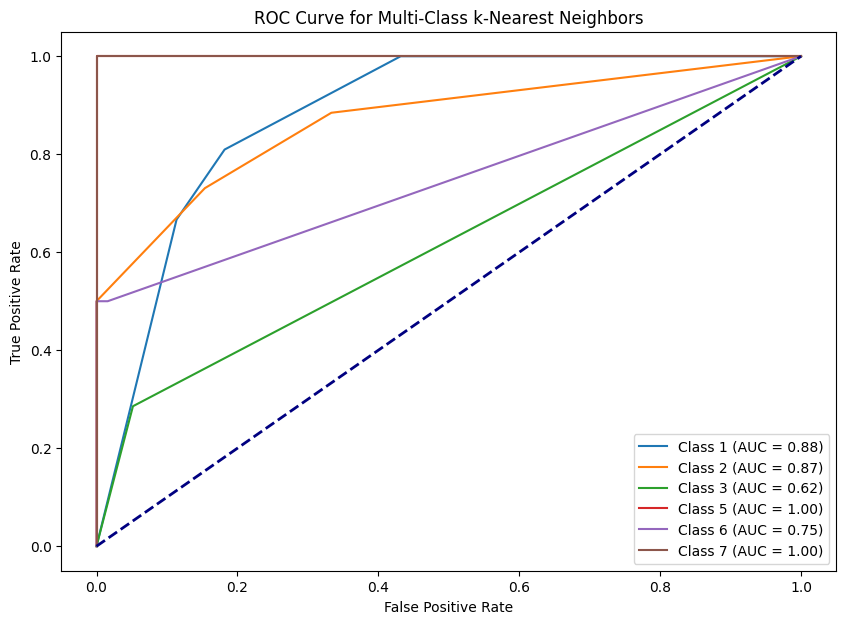

In [29]:
from sklearn.metrics import roc_curve, auc
y_score = knn.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
uniq_out=np.unique(y_train)
num_classes = len(np.unique(y_train))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

Cross-Validation:

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.53333333 0.63333333 0.63333333 0.6        0.72413793]
Mean Accuracy: 0.6248275862068965
